# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 5.335050000000001)

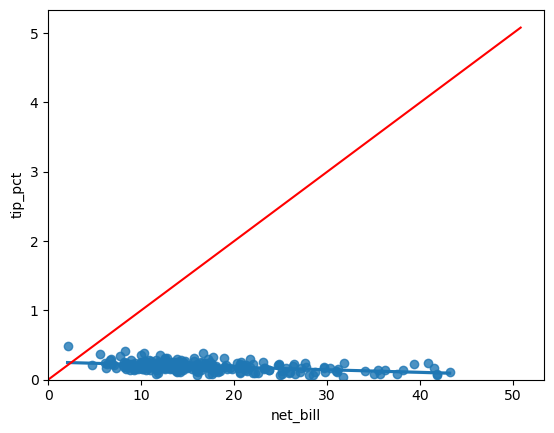

In [6]:
sns.regplot(y='tip_pct',x='net_bill', data=tips[tips['tip_pct']<.5])
x = np.linspace(0,tips['total_bill'].max(),100)
y = .1*x
plt.plot(x, y, '-r', label='linha dos 10%')
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [7]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.52e-06
Time:                        19:31:34   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [21]:
model = smf.ols(formula='tip_pct ~ np.log(net_bill)', data=tips)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.62e-13
Time:                        21:10:30   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [22]:
tips['net_bill_squared'] = tips['net_bill'] ** 2
model = smf.ols(formula='tip_pct ~ net_bill + net_bill_squared', data=tips)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.06e-09
Time:                        21:10:43   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
net_bill_squared     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [23]:
model = smf.ols(formula='np.log(tip_pct) ~ net_bill', data=tips)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 01 May 2023   Prob (F-statistic):           8.27e-16
Time:                        21:10:54   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
r_squared_tip_pct = 1 - results.ssr / results.centered_tss
print("R-quadrado (tip_pct):", r_squared_tip_pct)

R-quadrado (tip_pct): 0.23534487140864324


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [24]:
model = smf.ols(formula='np.log(tip_pct) ~ np.log(net_bill)', data=tips)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.20e-20
Time:                        21:11:06   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
r_squared_tip_pct = 1 - results.ssr / results.centered_tss
print("R-quadrado (tip_pct):", r_squared_tip_pct)

R-quadrado (tip_pct): 0.2934740215080778


###  6. qual modelo resultou no melhor ajuste?

O modelo que resultou no melhor ajuste foi o Modelo 4 (realizado na atividade 5), que é o modelo de ajuste no log da porcentagem da gorjeta (np.log(tip_pct)) em função do log do valor líquido da conta (np.log(net_bill)).

O melhor ajuste é indicado pelo maior valor de R-squared nesse modelo (0.293), e quanto mais esse valor se aproximar de 1, melhor o ajuste do modelo aos dados.